In [1]:
import sys

sys.path.append("../../src/stong_core_cython")
sys.path.append("../../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import restricted_hartree_fock
import basis_data
import importlib
from scipy.constants import physical_constants
from scipy.optimize import minimize

importlib.reload(restricted_hartree_fock)
importlib.reload(basis_data)

from atom import *
from restricted_hartree_fock import *
from basis_data import *

hartree_to_ev_factor = physical_constants["Hartree energy in eV"][0]
df = pd.read_csv("../make_base/sto_ng/sto_3g.csv")
df_zetas = pd.read_csv("./zetas.csv")

In [3]:
r = 1.4632
atoms = [Atom("He", np.array([0.0, 0.0, 0.0])), Atom("H", np.array([0.0, 0.0, r]))]
molecule = Molecule(atoms, charge=1)
basis_data = {
    "He": create_basis_data(df, [2.0925], 1, 0),
    "H": create_basis_data(df, [1.24], 1, 0),
}
hartreefock = RestrictedHartreeFock(molecule, basis_data, max_iter=10000, tol=1e-10)
hartreefock.scf()
hartreefock.calculate_total_energy()
results = hartreefock.get_results()
print(results)
results["energy"] + 2.0 / r

Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.]), Atom(symbol=H, atomic_number=1, position=[0.     0.     1.4632])])
{'energy': -4.227636214343578, 'P': array([[0.64296834, 0.27016922],
       [0.27016922, 0.11352255]]), 'val': array([-1.59745575, -0.06138677]), 'vec': array([[-0.80185307,  0.78223141],
       [-0.33693108, -1.0683313 ]])}


-2.860769073829636

In [5]:
energies = []

for r in np.linspace(0.5, 6.0, 100):
    atoms = [Atom("He", np.array([0.0, 0.0, 0.0])), Atom("H", np.array([0.0, 0.0, r]))]
    molecule = Molecule(atoms, charge=0)
    basis_data = {
        "He": create_basis_data(df, [2.0925], 1, 0),
        "H": create_basis_data(df, [1.24], 1, 0),
    }
    hartreefock = RestrictedHartreeFock(molecule, basis_data, max_iter=10000, tol=1e-10)
    hartreefock.scf()
    hartreefock.calculate_total_energy()
    results = hartreefock.get_results()
    energies.append(results["energy"] + 2.0 / r)

Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.]), Atom(symbol=H, atomic_number=1, position=[0.  0.  0.5])])
Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.]), Atom(symbol=H, atomic_number=1, position=[0.         0.         0.55555556])])
Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.]), Atom(symbol=H, atomic_number=1, position=[0.         0.         0.61111111])])
Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.]), Atom(symbol=H, atomic_number=1, position=[0.         0.         0.66666667])])
Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.]), Atom(symbol=H, atomic_number=1, position=[0.         0.         0.72222222])])
Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.]), Atom(symbol=H, atomic_number=1, position=[0.         0.         0.77777778])])
Start SCF for Molecule(atoms=[Atom(sy

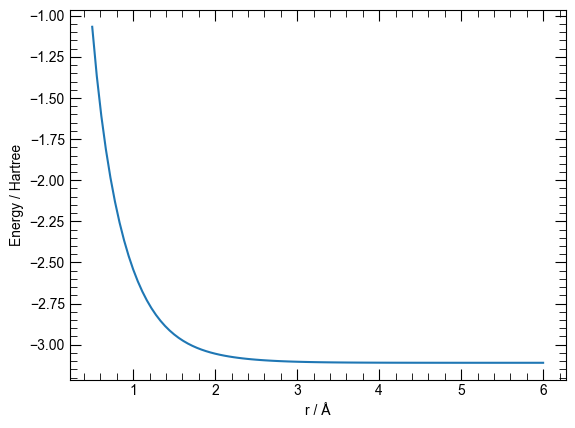

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.5, 6.0, 100), energies)
ax.set_xlabel("r / Å")
ax.set_ylabel("Energy / Hartree")
plt.show()